In [2]:
import pandas as pd
from matplotlib import pyplot as plt

In [3]:
df_aux_curso = pd.read_excel('data/Aux_Curso.xlsx',index_col=0)
df_aux_chamado = pd.read_excel('data/Aux_chamado.xlsx',index_col=0)
df_base_chamado = pd.read_excel('data/Base_Chamados.xlsx',index_col=0)
df_base_calouros = pd.read_excel('data/Base_log_calouros.xlsx',index_col=0)

print(f'df_aux_curso: {df_aux_curso.shape}')
print(f'df_aux_chamado: {df_aux_chamado.shape}')
print(f'df_base_chamado: {df_base_chamado.shape}')
print(f'df_base_calouros: {df_base_calouros.shape}')

df_aux_curso: (3652, 3)
df_aux_chamado: (83, 3)
df_base_chamado: (938182, 5)
df_base_calouros: (246110, 5)


In [82]:
df_aux_curso.head()

,CODIGO_CURSO,Ticket médio mensal,Grande área do curso
0,3,241,Humanas
1,6,143,Humanas
2,243,226,Humanas
3,246,347,Humanas
4,258,107,Humanas


In [83]:
df_aux_chamado.head()

,SHORT_DESCRIPTION,FRENTE,ÁREA DE SUPORTE RESPONSÁVEL
0,KrotonPDA > Serviços Acadêmicos > Atestado de ...,PORTAL,Secretaria Acadêmica
1,KrotonPDA > Serviços Acadêmicos > Histórico Es...,PORTAL,Secretaria Acadêmica
2,KrotonPDA > Serviços Acadêmicos > Inclusão de ...,PORTAL,Secretaria Acadêmica
3,KrotonPDA > Serviços Acadêmicos > Suspensão de...,PORTAL,Secretaria Acadêmica
4,KrotonPDA > Serviços Financeiros > Alterar o ...,PORTAL,Financeiro


In [84]:
df_base_chamado.head()

,NUMBER_SN,SYS_CREATED_ON,SHORT_DESCRIPTION,RA_ALUNO,FRENTE
1,CS2245705,2020-03-14 14:08:30,PAD > 1. Graduação Presencial > Atendimento de...,3489323595,PRES
4,CS1496976,2020-01-30 16:14:06,PDA > Serviços Acadêmicos > Entregar Atividade...,818823833,PORTAL
5,CS1541894,2020-02-04 15:01:09,PDA > Serviços Acadêmicos > Atestado de Matrícula,379127814579,PORTAL
9,CS1550304,2020-02-04 20:57:00,PDA > Serviços Financeiros > Não Consigo Gerar...,365392513920,PORTAL
12,CS1913239,2020-03-03 12:23:24,PDA > Serviços Acadêmicos > Alterar Meu Curso ...,373087769067,PORTAL


In [85]:
df_base_calouros.head()

,CODIGO_ALUNO,CODIGO_CURSO,DATA_LOG,SITUACAO_ALUNO,TIPO_ALUNO
13,11185893,543,2020-06-25,E,Calouro
14,11185893,543,2020-01-04,C,Calouro
15,11185893,543,2020-01-03,P,Calouro
19,3941358,2802,2020-02-20,C,Calouro
20,3941358,2802,2020-01-22,P,Calouro


In [105]:
df_base_chamado.head()

,NUMBER_SN,SYS_CREATED_ON,SHORT_DESCRIPTION,RA_ALUNO,FRENTE
1,CS2245705,2020-03-14 14:08:30,PAD > 1. Graduação Presencial > Atendimento de...,3489323595,PRES
4,CS1496976,2020-01-30 16:14:06,PDA > Serviços Acadêmicos > Entregar Atividade...,818823833,PORTAL
5,CS1541894,2020-02-04 15:01:09,PDA > Serviços Acadêmicos > Atestado de Matrícula,379127814579,PORTAL
9,CS1550304,2020-02-04 20:57:00,PDA > Serviços Financeiros > Não Consigo Gerar...,365392513920,PORTAL
12,CS1913239,2020-03-03 12:23:24,PDA > Serviços Acadêmicos > Alterar Meu Curso ...,373087769067,PORTAL


In [106]:
df_base_calouros.head()

,CODIGO_ALUNO,CODIGO_CURSO,DATA_LOG,SITUACAO_ALUNO,TIPO_ALUNO
13,11185893,543,2020-06-25,E,Calouro
14,11185893,543,2020-01-04,C,Calouro
15,11185893,543,2020-01-03,P,Calouro
19,3941358,2802,2020-02-20,C,Calouro
20,3941358,2802,2020-01-22,P,Calouro


In [87]:
df_base_calouros['TIPO_ALUNO'].drop_duplicates()

13    Calouro
Name: TIPO_ALUNO, dtype: object

In [88]:
df_base_calouros_cursando_matriculado = df_base_calouros[df_base_calouros['SITUACAO_ALUNO'].isin(["C","F","R","S","M"])]
df_base_calouros_cursando = df_base_calouros[df_base_calouros['SITUACAO_ALUNO'].isin(["C","F","R","S"])]
df_base_calouros_evadidos = df_base_calouros[df_base_calouros['SITUACAO_ALUNO'].isin(["E"])]
df_base_calouros_transferidos = df_base_calouros[df_base_calouros['SITUACAO_ALUNO'].isin(["T"])]

calouros_cursando_matriculado = df_base_calouros_cursando_matriculado["CODIGO_ALUNO"].nunique()
calouros_cursando = df_base_calouros_cursando["CODIGO_ALUNO"].nunique()
calouros_evadidos = df_base_calouros_evadidos["CODIGO_ALUNO"].nunique()
calouros_transferidos = df_base_calouros_transferidos["CODIGO_ALUNO"].nunique()

print(f'calouros_cursando_matriculado: {calouros_cursando_matriculado}')
print(f'calouros_cursando: {calouros_cursando}')
print(f'calouros_evadidos: {calouros_evadidos}')
print(f'calouros_transferidos: {calouros_transferidos}')

calouros_cursando_matriculado: 98353
calouros_cursando: 98352
calouros_evadidos: 37435
calouros_transferidos: 2918


In [89]:
df_base_calouros_diff_cursando_matriculado_evadidos = df_base_calouros_cursando_matriculado[df_base_calouros_cursando_matriculado['CODIGO_ALUNO'].isin(df_base_calouros_evadidos['CODIGO_ALUNO'])]
diff_cursando_matriculado_evadidos = df_base_calouros_diff_cursando_matriculado_evadidos["CODIGO_ALUNO"].nunique()

percent_calouros_cursando_matriculado_evadidos = diff_cursando_matriculado_evadidos/calouros_cursando_matriculado

print(f'percent_calouros_cursando_matriculado_evadidos: {round(100*percent_calouros_cursando_matriculado_evadidos,2)}%')

percent_calouros_cursando_matriculado_evadidos: 33.49%


In [90]:
df_base_calouros_diff_cursando_evadidos = df_base_calouros_cursando[df_base_calouros_cursando['CODIGO_ALUNO'].isin(df_base_calouros_evadidos['CODIGO_ALUNO'])]
diff_cursando_matriculado_evadidos = df_base_calouros_diff_cursando_evadidos["CODIGO_ALUNO"].nunique()

percent_calouros_cursando_evadidos = diff_cursando_matriculado_evadidos/calouros_cursando

print(f'percent_calouros_cursando_evadidos: {round(100*percent_calouros_cursando_evadidos,2)}%')

percent_calouros_cursando_evadidos: 33.49%


In [91]:
df_base_calouros_diff_cursando_matriculado_transferidos = df_base_calouros_cursando_matriculado[df_base_calouros_cursando_matriculado['CODIGO_ALUNO'].isin(df_base_calouros_transferidos['CODIGO_ALUNO'])]
diff_cursando_matriculado_transferidos = df_base_calouros_diff_cursando_matriculado_transferidos["CODIGO_ALUNO"].nunique()

percent_calouros_cursando_matriculado_transferidos = diff_cursando_matriculado_transferidos/calouros_cursando_matriculado

# print(diff_cursando_matriculado_transferidos,calouros_cursando_matriculado)
print(f'percent_calouros_cursando_matriculado_transferidos: {round(100*percent_calouros_cursando_matriculado_transferidos,2)}%')

percent_calouros_cursando_matriculado_transferidos: 2.92%


In [92]:
df_base_calouros_diff_cursando_transferidos = df_base_calouros_cursando[df_base_calouros_cursando['CODIGO_ALUNO'].isin(df_base_calouros_transferidos['CODIGO_ALUNO'])]
diff_cursando_transferidos = df_base_calouros_diff_cursando_transferidos["CODIGO_ALUNO"].nunique()

percent_calouros_cursando_transferidos = diff_cursando_transferidos/calouros_cursando

# print(diff_cursando_transferidos,calouros_cursando)
print(f'percent_calouros_cursando_transferidos: {round(100*percent_calouros_cursando_transferidos,2)}%')

percent_calouros_cursando_transferidos: 2.92%


In [93]:
df_base_calouros_with_curso = pd.merge(df_base_calouros,df_aux_curso,how='left',on='CODIGO_CURSO')
df_base_calouros_with_curso.head()

,CODIGO_ALUNO,CODIGO_CURSO,DATA_LOG,SITUACAO_ALUNO,TIPO_ALUNO,Ticket médio mensal,Grande área do curso
0,11185893,543,2020-06-25,E,Calouro,267,Humanas
1,11185893,543,2020-01-04,C,Calouro,267,Humanas
2,11185893,543,2020-01-03,P,Calouro,267,Humanas
3,3941358,2802,2020-02-20,C,Calouro,125,Humanas
4,3941358,2802,2020-01-22,P,Calouro,125,Humanas


array([[<AxesSubplot:title={'center':'Ticket médio mensal'}>]],
      dtype=object)

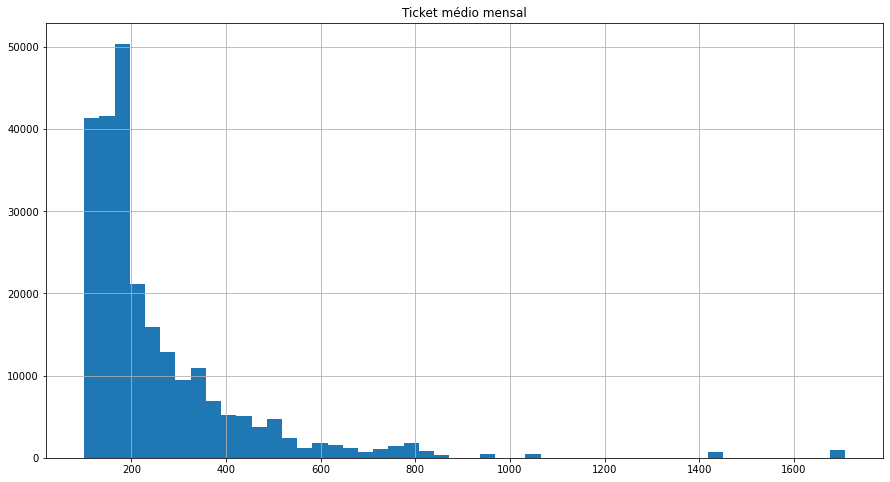

In [94]:
df_base_calouros_with_curso.hist(column='Ticket médio mensal',bins=50,figsize=(15,8))

array([[<AxesSubplot:title={'center':'Ticket médio mensal'}>]],
      dtype=object)

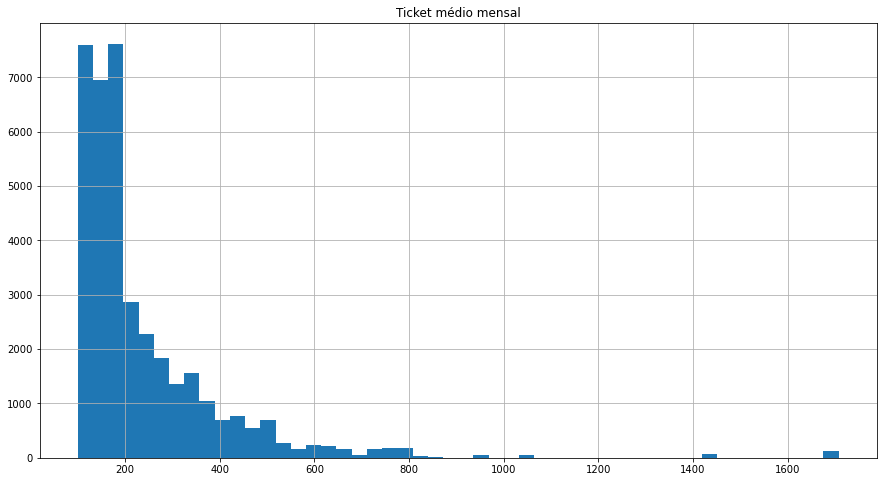

In [95]:
df_base_calouros_with_curso[df_base_calouros_with_curso['SITUACAO_ALUNO'].isin(["E"])].hist(column='Ticket médio mensal',bins=50,figsize=(15,8))

array([[<AxesSubplot:title={'center':'Ticket médio mensal'}>]],
      dtype=object)

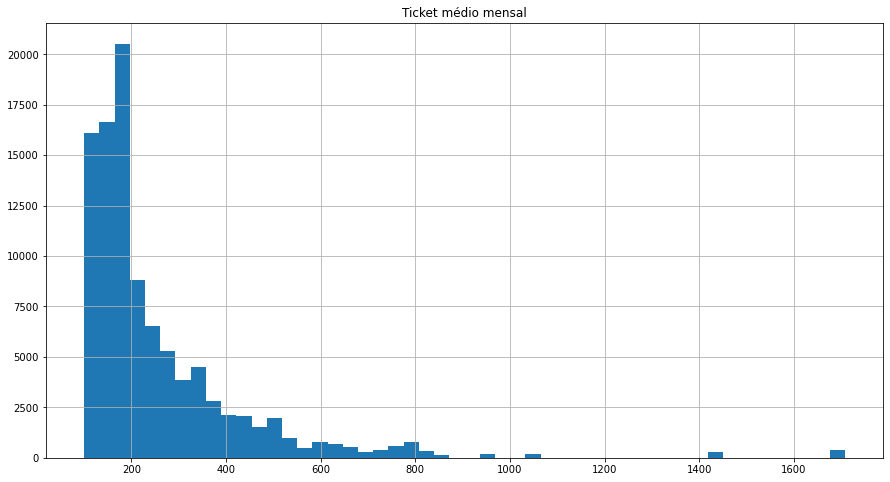

In [96]:
df_base_calouros_with_curso[df_base_calouros_with_curso['SITUACAO_ALUNO'].isin(["C","F","R","S","M"])].hist(column='Ticket médio mensal',bins=50,figsize=(15,8))

In [97]:
df_base_calouros_with_curso.groupby(['Grande área do curso'],as_index=False)['CODIGO_ALUNO'].nunique()

,Grande área do curso,CODIGO_ALUNO
0,Biológicas,22096
1,Exatas,37348
2,Humanas,44289


In [98]:
df_base_calouros_with_curso_cursando = df_base_calouros_with_curso[df_base_calouros_with_curso['SITUACAO_ALUNO'].isin(["C","F","R","S","M"])]
df_base_calouros_with_curso_cursando_total = df_base_calouros_with_curso_cursando.groupby(['Grande área do curso'],as_index=False)['CODIGO_ALUNO'].nunique().rename(columns={'CODIGO_ALUNO':'CALOUROS_CURSANDO'})
df_base_calouros_with_curso_cursando_total

,Grande área do curso,CALOUROS_CURSANDO
0,Biológicas,20863
1,Exatas,35589
2,Humanas,42083


In [99]:
df_base_calouros_with_curso_evadidos = df_base_calouros_with_curso[df_base_calouros_with_curso['SITUACAO_ALUNO'].isin(["E"])]

calouros_cursando = df_base_calouros_with_curso_cursando['CODIGO_ALUNO'].drop_duplicates()

df_base_calouros_with_curso_evadidos_cursando = df_base_calouros_with_curso_evadidos[df_base_calouros_with_curso_evadidos['CODIGO_ALUNO'].isin(calouros_cursando)]



df_base_calouros_with_curso_evadidos_cursando_total = df_base_calouros_with_curso_evadidos_cursando.groupby(['Grande área do curso'],as_index=False)['CODIGO_ALUNO'].nunique().rename(columns={'CODIGO_ALUNO':'CALOUROS_EVADIDOS'})
df_base_calouros_with_curso_evadidos_cursando_total


,Grande área do curso,CALOUROS_EVADIDOS
0,Biológicas,6983
1,Exatas,12808
2,Humanas,13231


In [100]:
df_curso_resume = pd.merge(
    df_base_calouros_with_curso_cursando_total,
    df_base_calouros_with_curso_evadidos_cursando_total,
    how='left',
    on='Grande área do curso'
    )
df_curso_resume['percent'] = df_curso_resume['CALOUROS_EVADIDOS']/df_curso_resume['CALOUROS_CURSANDO']
df_curso_resume

,Grande área do curso,CALOUROS_CURSANDO,CALOUROS_EVADIDOS,percent
0,Biológicas,20863,6983,0.334707
1,Exatas,35589,12808,0.359886
2,Humanas,42083,13231,0.314402


In [ ]:
# df_base_chamado.info()
# df_base_calouros_with_curso.info()
intersection = [i for i in df_base_calouros_with_curso['CODIGO_ALUNO'].astype(str).drop_duplicates().values if i in df_base_chamado['RA_ALUNO'].drop_duplicates().values]
intersection
# df_base_calouros_with_curso_and_chamado = pd.merge(
#     df_base_calouros_with_curso,
#     df_base_chamado.groupby(['RA_ALUNO'],as_index=False)['SHORT_DESCRIPTION'].count().rename(columns={'SHORT_DESCRIPTION':'SHORT_DESCRIPTION_COUNT'}),
#     how='left',
#     right_on='RA_ALUNO',
#     left_on='CODIGO_ALUNO'
# )
# df_base_calouros_with_curso_and_chamado['SHORT_DESCRIPTION_COUNT'].fillna(0,inplace=True)
# df_base_calouros_with_curso_and_chamado.head(10)

array([[<AxesSubplot:title={'center':'SHORT_DESCRIPTION_COUNT'}>]],
      dtype=object)

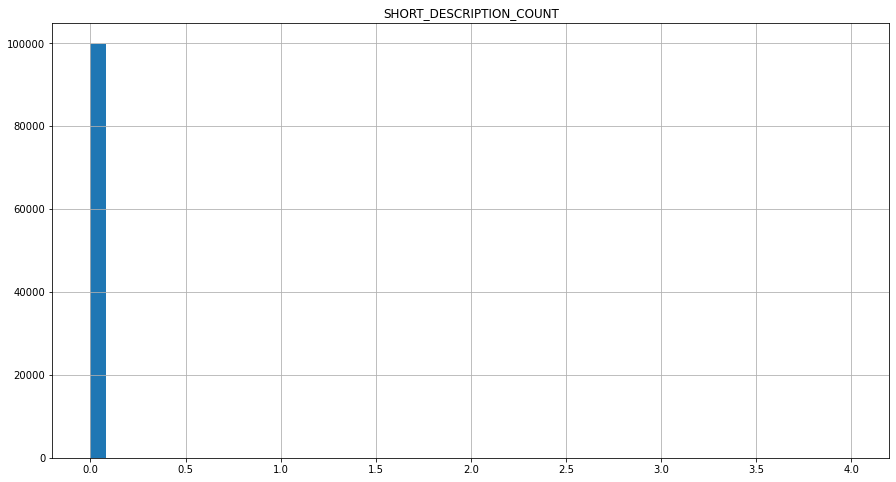

In [102]:
df_base_calouros_with_curso_and_chamado[df_base_calouros_with_curso_and_chamado['SITUACAO_ALUNO'].isin(["C","F","R","S","M"])].hist(column='SHORT_DESCRIPTION_COUNT',bins=50,figsize=(15,8))

array([[<AxesSubplot:title={'center':'SHORT_DESCRIPTION_COUNT'}>]],
      dtype=object)

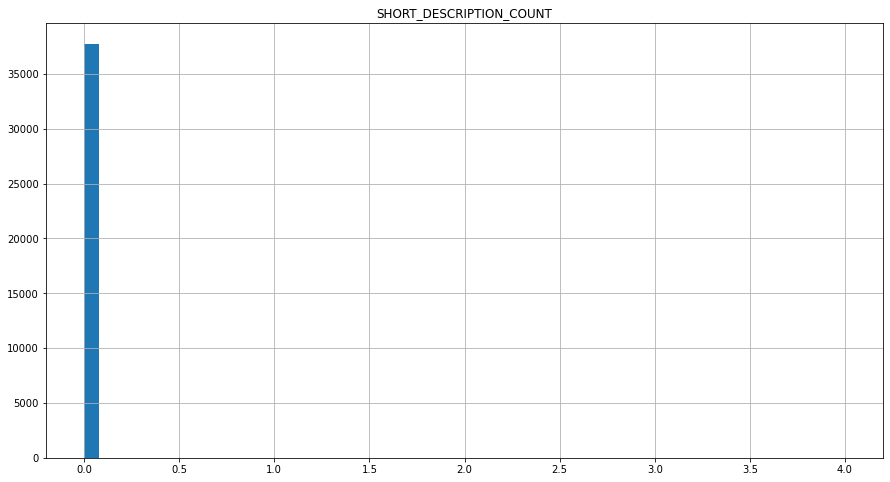

In [103]:
df_base_calouros_with_curso_and_chamado[df_base_calouros_with_curso_and_chamado['SITUACAO_ALUNO'].isin(["E"])].hist(column='SHORT_DESCRIPTION_COUNT',bins=50,figsize=(15,8))